# **Vehicle Maintenance Prediction**


# Importing Libraries

In [1]:
#importing necessary libraries
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from imblearn.over_sampling import SMOTE
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score,roc_curve, roc_auc_score,mean_squared_error

# Loading the Dataset

In [2]:
#Loading the dataset
dataset = pd.read_csv("/Users/mohdshoyeb/Downloads/vehicle_maintenance_data.csv")

In [3]:
# Assuming `dataset` is a variable containing data, we convert it into a pandas DataFrame
dataset = pd.DataFrame(dataset)

# Displaying the first 15 rows of the DataFrame to inspect the data
dataset.head(15)

,Vehicle_Model,Mileage,Maintenance_History,Reported_Issues,Vehicle_Age,Fuel_Type,Transmission_Type,Engine_Size,Odometer_Reading,Last_Service_Date,Warranty_Expiry_Date,Owner_Type,Insurance_Premium,Service_History,Accident_History,Fuel_Efficiency,Tire_Condition,Brake_Condition,Battery_Status,Need_Maintenance
0,Truck,58765,Good,0,4,Electric,Automatic,2000,28524,2023-11-23,2025-06-24,Second,20782,6,3,13.622204,New,New,Weak,1
1,Van,60353,Average,1,7,Electric,Automatic,2500,133630,2023-09-21,2025-06-04,Second,23489,7,0,13.625307,New,New,Weak,1
2,Bus,68072,Poor,0,2,Electric,Automatic,1500,34022,2023-06-27,2025-04-27,First,17979,7,0,14.306302,New,Good,Weak,1
3,Bus,60849,Average,4,5,Petrol,Automatic,2500,81636,2023-08-24,2025-11-05,Second,6220,7,3,18.709467,New,Worn Out,New,1
4,Bus,45742,Poor,5,1,Petrol,Manual,2000,97162,2023-05-25,2025-09-14,Third,16446,6,2,16.977482,Good,Good,Weak,1
5,Truck,31653,Average,2,1,Diesel,Automatic,800,70954,2023-08-12,2024-09-05,Third,16813,5,3,15.954422,Worn Out,Good,New,0
6,Motorcycle,51211,Average,2,8,Diesel,Automatic,2500,145563,2024-01-13,2025-07-20,Second,21057,10,0,16.455703,New,Good,New,0
7,Van,79093,Poor,2,2,Petrol,Automatic,2000,132354,2023-05-12,2026-02-13,First,6498,3,1,12.128404,Good,New,New,1
8,SUV,59673,Good,2,6,Electric,Manual,800,85733,2023-04-07,2025-04-21,First,12787,9,1,11.558027,Worn Out,Good,Weak,1
9,Bus,37001,Good,2,9,Diesel,Automatic,1500,8554,2023-08-05,2025-05-14,Third,20860,9,1,12.787248,Worn Out,New,New,0


In [4]:
# Printing the shape of the dataset to show the number of rows and columns
print("\nShape of the dataset:", dataset.shape)


Shape of the dataset: (50000, 20)


# **Exploring the data**

In [5]:
#Displaying Column 
dataset.columns

Index(['Vehicle_Model', 'Mileage', 'Maintenance_History', 'Reported_Issues',
       'Vehicle_Age', 'Fuel_Type', 'Transmission_Type', 'Engine_Size',
       'Odometer_Reading', 'Last_Service_Date', 'Warranty_Expiry_Date',
       'Owner_Type', 'Insurance_Premium', 'Service_History',
       'Accident_History', 'Fuel_Efficiency', 'Tire_Condition',
       'Brake_Condition', 'Battery_Status', 'Need_Maintenance'],
      dtype='object')

In [6]:
# Displaying dataset information
print(dataset.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 20 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Vehicle_Model         50000 non-null  object 
 1   Mileage               50000 non-null  int64  
 2   Maintenance_History   50000 non-null  object 
 3   Reported_Issues       50000 non-null  int64  
 4   Vehicle_Age           50000 non-null  int64  
 5   Fuel_Type             50000 non-null  object 
 6   Transmission_Type     50000 non-null  object 
 7   Engine_Size           50000 non-null  int64  
 8   Odometer_Reading      50000 non-null  int64  
 9   Last_Service_Date     50000 non-null  object 
 10  Warranty_Expiry_Date  50000 non-null  object 
 11  Owner_Type            50000 non-null  object 
 12  Insurance_Premium     50000 non-null  int64  
 13  Service_History       50000 non-null  int64  
 14  Accident_History      50000 non-null  int64  
 15  Fuel_Efficiency    

In [7]:
#Summary statistics of numerical variables
print("\nSummary statistics of numerical variables:\n")
dataset.describe()


Summary statistics of numerical variables:



,Mileage,Reported_Issues,Vehicle_Age,Engine_Size,Odometer_Reading,Insurance_Premium,Service_History,Accident_History,Fuel_Efficiency,Need_Maintenance
count,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.00000,50000.000000,50000.000000
mean,54931.232680,2.497420,5.492260,1556.292000,75551.187060,17465.340700,5.515560,1.50156,14.990323,0.809960
std,14401.912925,1.708781,2.875682,627.677218,43088.105658,7223.393401,2.874899,1.11951,2.885583,0.392336
min,30001.000000,0.000000,1.000000,800.000000,1001.000000,5000.000000,1.000000,0.00000,10.000098,0.000000
25%,42471.500000,1.000000,3.000000,1000.000000,38009.000000,11189.750000,3.000000,0.00000,12.489037,1.000000
50%,54810.000000,2.000000,5.000000,1500.000000,75598.500000,17477.500000,6.000000,2.00000,14.986352,1.000000
75%,67391.500000,4.000000,8.000000,2000.000000,112999.500000,23692.000000,8.000000,3.00000,17.474676,1.000000
max,80000.000000,5.000000,10.000000,2500.000000,149999.000000,30000.000000,10.000000,3.00000,19.999968,1.000000


# Visualizing the Target Variable

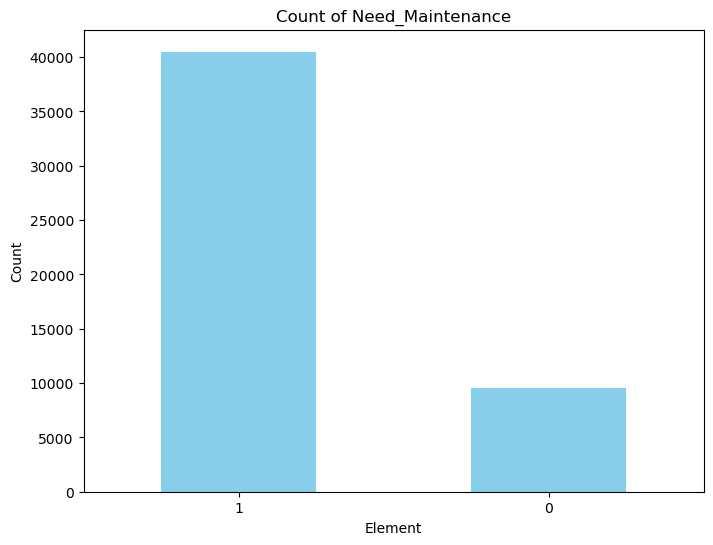

In [8]:
# Specifying the column of interest
column_of_interest = 'Need_Maintenance'  

# Get the value counts of the specified column
value_counts = dataset[column_of_interest].value_counts()

# Plotting a bar chart of the value counts
# Adjusting the figure size 
plt.figure(figsize=(8, 6))  
# Creating a bar plot
value_counts.plot(kind='bar', color='skyblue')
# Adding a title to the plot
plt.title(f'Count of {column_of_interest}') 
# Adding label to x-axis
plt.xlabel('Element')  
# Adding label to y-axis
plt.ylabel('Count')  
 # Rotating x-axis labels 
plt.xticks(rotation=0)
plt.show()


# Data Cleaning and Encoding 

In [9]:
#Dropping the unnecessary columns
dataset.drop(columns=["Vehicle_Model", "Warranty_Expiry_Date", "Insurance_Premium", "Service_History", "Accident_History", "Fuel_Efficiency", "Engine_Size"], inplace=True)


In [10]:
print(dataset.columns)

Index(['Mileage', 'Maintenance_History', 'Reported_Issues', 'Vehicle_Age',
       'Fuel_Type', 'Transmission_Type', 'Odometer_Reading',
       'Last_Service_Date', 'Owner_Type', 'Tire_Condition', 'Brake_Condition',
       'Battery_Status', 'Need_Maintenance'],
      dtype='object')


In [11]:
string_columns = ['Tire_Condition', 'Brake_Condition']  # List of columns containing string values

label_encoder = LabelEncoder()  # Initializing the LabelEncoder object

# Encoding string columns using LabelEncoder
for col in string_columns:
    dataset[col] = label_encoder.fit_transform(dataset[col])

# Printing the mapping of original string values to encoded integer values for each column
for col in string_columns:
    mapping = dict(zip(label_encoder.classes_, label_encoder.transform(label_encoder.classes_)))
    print(f"{col}: {mapping}")  


Tire_Condition: {'Good': 0, 'New': 1, 'Worn Out': 2}
Brake_Condition: {'Good': 0, 'New': 1, 'Worn Out': 2}


In [12]:
string_columns1 = ['Owner_Type']  # List of columns containing string values

# Encoding 'Owner_Type' column using LabelEncoder
for col in string_columns1:
    dataset[col] = label_encoder.fit_transform(dataset[col])

# Printing the mapping of original string values to encoded integer values for the 'Owner_Type' column
for col in string_columns1:
    mapping = dict(zip(label_encoder.classes_, label_encoder.transform(label_encoder.classes_)))
    print(f"{col}: {mapping}")  

Owner_Type: {'First': 0, 'Second': 1, 'Third': 2}


In [13]:
string_columns2 = ['Battery_Status']  # List of columns containing string values

# Encoding 'Battery_Status' column using LabelEncoder
for col in string_columns2:
    dataset[col] = label_encoder.fit_transform(dataset[col])

# Printing the mapping of original string values to encoded integer values for the 'Battery_Status' column
for col in string_columns2:
    mapping = dict(zip(label_encoder.classes_, label_encoder.transform(label_encoder.classes_)))
    print(f"{col}: {mapping}") 

Battery_Status: {'Good': 0, 'New': 1, 'Weak': 2}


In [14]:
string_columns3 = ['Transmission_Type']  # List of columns containing string values

# Encoding 'Transmission_Type' column using LabelEncoder
for col in string_columns3:
    dataset[col] = label_encoder.fit_transform(dataset[col])

# Printing the mapping of original string values to encoded integer values for the 'Transmission_Type' column
for col in string_columns3:
    mapping = dict(zip(label_encoder.classes_, label_encoder.transform(label_encoder.classes_)))
    print(f"{col}: {mapping}")  


Transmission_Type: {'Automatic': 0, 'Manual': 1}


In [15]:
string_columns4 = ['Maintenance_History']  # List of columns containing string values

# Encoding 'Maintenance_History' column using LabelEncoder
for col in string_columns4:
    dataset[col] = label_encoder.fit_transform(dataset[col])

# Printing the mapping of original string values to encoded integer values for the 'Maintenance_History' column
for col in string_columns4:
    mapping = dict(zip(label_encoder.classes_, label_encoder.transform(label_encoder.classes_)))
    print(f"{col}: {mapping}")  


Maintenance_History: {'Average': 0, 'Good': 1, 'Poor': 2}


In [16]:
string_columns5 = ['Fuel_Type']  # List of columns containing string values

# Encoding 'Fuel_Type' column using LabelEncoder
for col in string_columns5:
    dataset[col] = label_encoder.fit_transform(dataset[col])

# Printing the mapping of original string values to encoded integer values for the 'Fuel_Type' column
for col in string_columns5:
    mapping = dict(zip(label_encoder.classes_, label_encoder.transform(label_encoder.classes_)))
    print(f"{col}: {mapping}")  # Printing the mapping


Fuel_Type: {'Diesel': 0, 'Electric': 1, 'Petrol': 2}


In [17]:
columns_to_convert = ['Mileage', 'Odometer_Reading']  # List of columns to convert to float type

# Convert each column to float type
for column in columns_to_convert:
    dataset[column] = dataset[column].astype(float)

In [18]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 13 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Mileage              50000 non-null  float64
 1   Maintenance_History  50000 non-null  int64  
 2   Reported_Issues      50000 non-null  int64  
 3   Vehicle_Age          50000 non-null  int64  
 4   Fuel_Type            50000 non-null  int64  
 5   Transmission_Type    50000 non-null  int64  
 6   Odometer_Reading     50000 non-null  float64
 7   Last_Service_Date    50000 non-null  object 
 8   Owner_Type           50000 non-null  int64  
 9   Tire_Condition       50000 non-null  int64  
 10  Brake_Condition      50000 non-null  int64  
 11  Battery_Status       50000 non-null  int64  
 12  Need_Maintenance     50000 non-null  int64  
dtypes: float64(2), int64(10), object(1)
memory usage: 5.0+ MB


# **Visualizations**

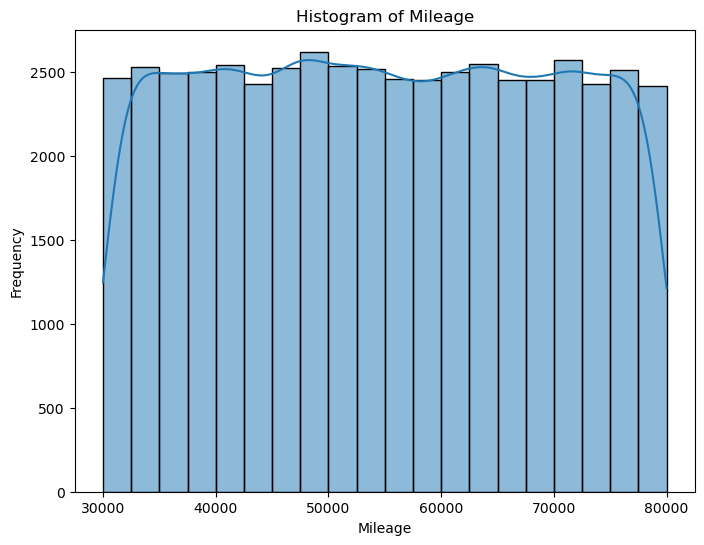

In [19]:
# Set the figure size for the plot to 8 inches by 6 inches
plt.figure(figsize=(8, 6))

# sns.histplot(): Using seaborn to create a histogram plot
# dataset['Mileage']: Data to be plotted
# bins=20: Divide the range of values into 20 bins
# kde=True: Plot a kernel density estimate along with the histogram
sns.histplot(dataset['Mileage'], bins=20, kde=True)

# Add a title to the plot
plt.title('Histogram of Mileage')

# Label the x-axis as 'Mileage'
plt.xlabel('Mileage')

# Label the y-axis as 'Frequency'
plt.ylabel('Frequency')

# Display the plot
plt.show()


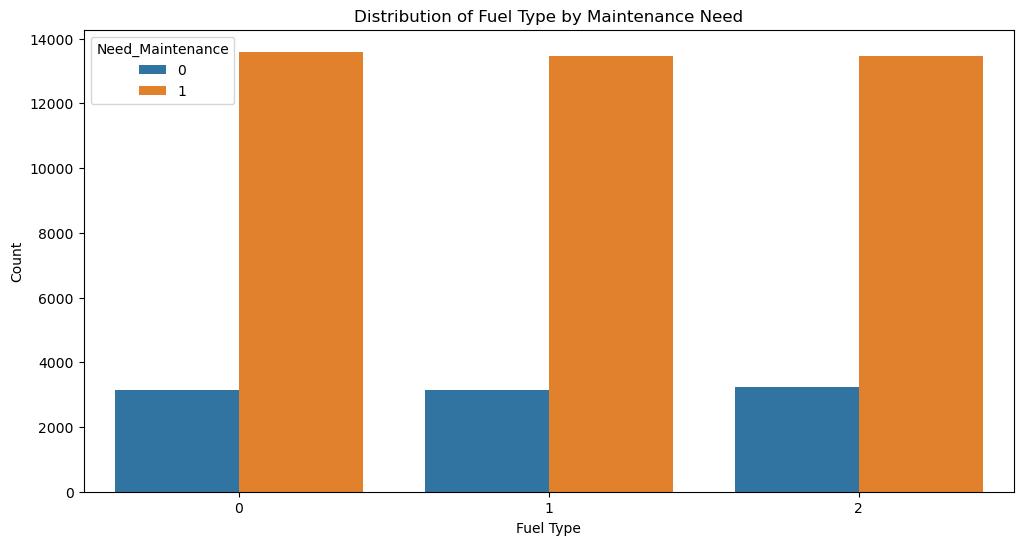

In [20]:
# Set the figure size for the plot to 12 inches by 6 inches
plt.figure(figsize=(12, 6))

# sns.countplot(): Using seaborn to create a count plot
# x='Fuel_Type': Categorize the data based on 'Fuel_Type'
# data=dataset: Data source is the dataset
# hue='Need_Maintenance': Further categorize the data by 'Need_Maintenance'
sns.countplot(x='Fuel_Type', data=dataset, hue='Need_Maintenance')

# Add a title to the plot
plt.title('Distribution of Fuel Type by Maintenance Need')

# Label the x-axis as 'Fuel Type'
plt.xlabel('Fuel Type')

# Label the y-axis as 'Count'
plt.ylabel('Count')

# Display the plot
plt.show()


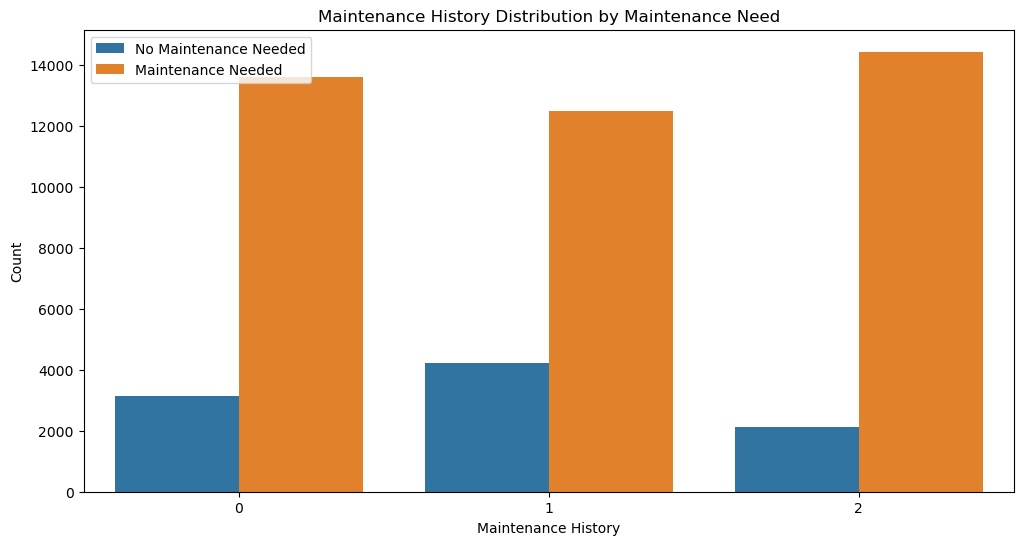

In [21]:
# Set the figure size for the plot to 12 inches by 6 inches
plt.figure(figsize=(12, 6))

# sns.countplot(): Using seaborn to create a count plot
# x='Maintenance_History': Categorize the data based on 'Maintenance_History'
# hue='Need_Maintenance': Further categorize the data by 'Need_Maintenance'
# data=dataset: Data source is the dataset
sns.countplot(x='Maintenance_History', hue='Need_Maintenance', data=dataset)

# Add a title to the plot
plt.title('Maintenance History Distribution by Maintenance Need')

# Label the x-axis as 'Maintenance History'
plt.xlabel('Maintenance History')

# Label the y-axis as 'Count'
plt.ylabel('Count')

# Add legend with custom labels
plt.legend(labels=['No Maintenance Needed', 'Maintenance Needed'], loc='upper left')

# Display the plot
plt.show()


/Users/mohdshoyeb/anaconda3/lib/python3.11/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


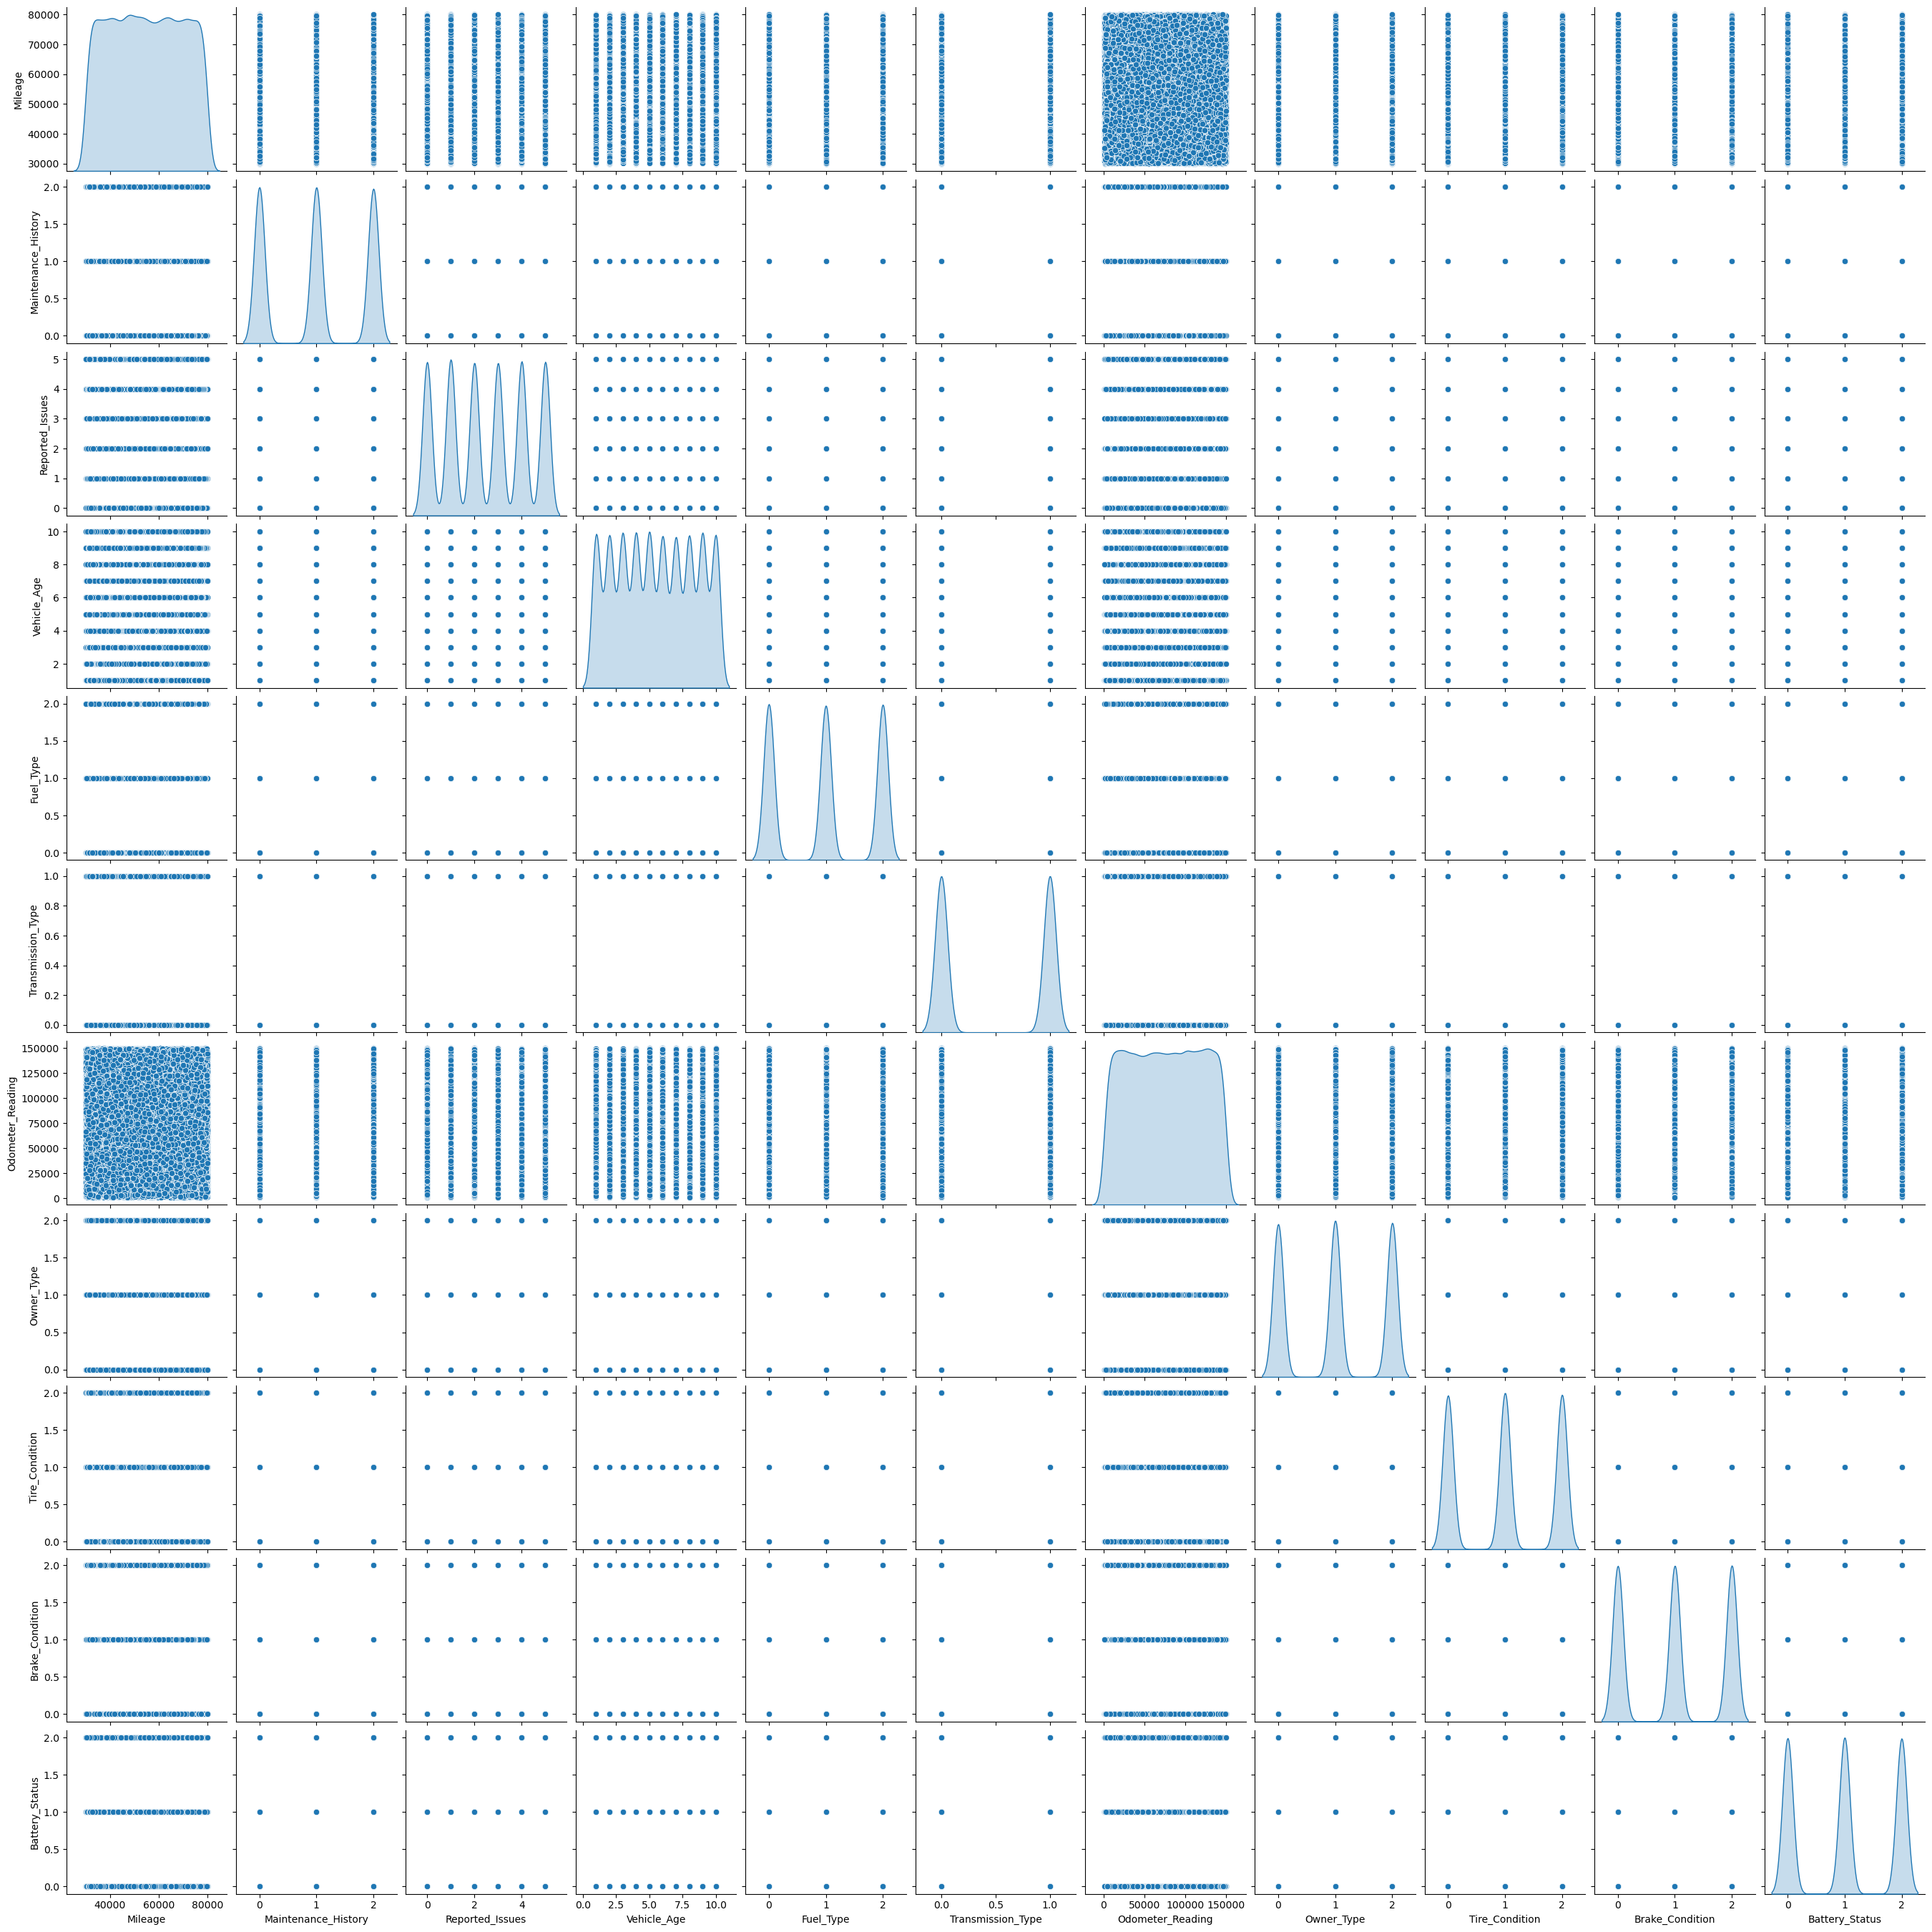

In [22]:
# Remove the columns "Need_Maintenance" and "Last_Service_Date" from the dataset
# This will create a new DataFrame with these columns dropped
data = dataset.drop(columns=["Need_Maintenance", "Last_Service_Date"])

# sns.pairplot(): Using seaborn to create a pairplot
# data: Data source is the modified dataset without the dropped columns
# diag_kind='kde': Use kernel density estimation for the diagonal plots
# markers='o': Use circular markers for the scatter plots
sns.pairplot(data, diag_kind='kde', markers='o')

# Display the pairplot
plt.show()


<h1>Normalization

In [23]:
# Initialize the StandardScaler
scaler = StandardScaler()

# Convert dataset to a DataFrame if it's not already
dataset = pd.DataFrame(dataset)

# List of columns to scale
scaled = ['Mileage', 'Odometer_Reading']

# Scale the selected columns using the StandardScaler
# scaler.fit_transform(): Compute the mean and standard deviation for scaling and then perform scaling
# dataset[scaled]: Select the columns to be scaled
# scaler.fit_transform(dataset[scaled]): Apply the transformation to the selected columns
dataset[scaled] = scaler.fit_transform(dataset[scaled])


In [24]:
dataset.head()

,Mileage,Maintenance_History,Reported_Issues,Vehicle_Age,Fuel_Type,Transmission_Type,Odometer_Reading,Last_Service_Date,Owner_Type,Tire_Condition,Brake_Condition,Battery_Status,Need_Maintenance
0,0.266201,1,0,4,1,0,-1.091430,2023-11-23,1,1,1,2,1
1,0.376465,0,1,7,1,0,1.347922,2023-09-21,1,1,1,2,1
2,0.912441,2,0,2,1,0,-0.963830,2023-06-27,0,1,0,2,1
3,0.410906,0,4,5,2,0,0.141219,2023-08-24,1,1,2,1,1
4,-0.638063,2,5,1,2,1,0.501554,2023-05-25,2,0,0,2,1


In [25]:
df = dataset.drop(columns="Last_Service_Date") 

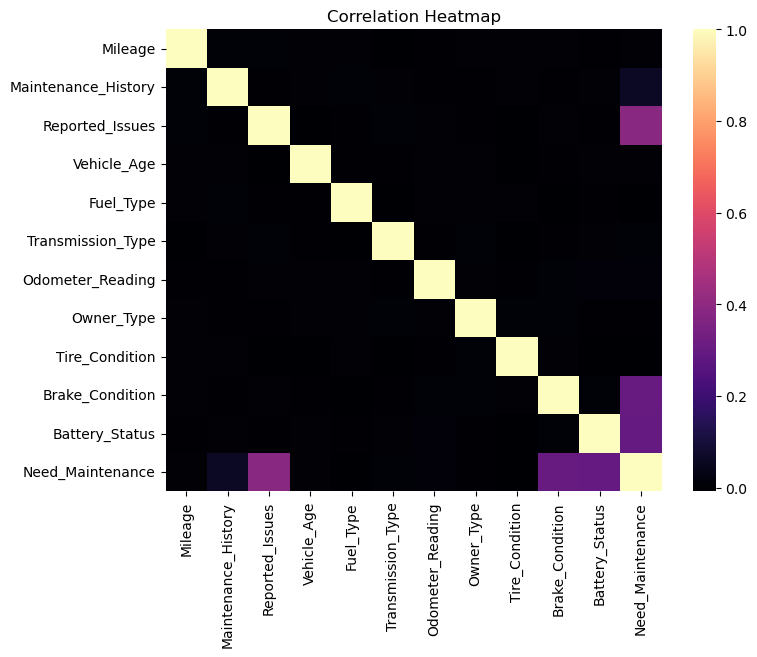

In [26]:
# Plotting correlation heatmap
# Set the figure size for the plot to 8 inches by 6 inches
plt.figure(figsize=(8, 6))

# sns.heatmap(): Using seaborn to create a heatmap
# df.corr(): Compute the correlation matrix of the DataFrame
# cmap='magma': Use the 'magma' color map for the heatmap
# fmt=".2f": Format the annotation to display correlation values with two decimal places
sns.heatmap(df.corr(), cmap='magma', fmt=".2f")

# Add a title to the plot
plt.title('Correlation Heatmap')

# Display the plot
plt.show()


# **Classification**

In [27]:
# Extracting features (independent variables) from the dataset
x = dataset.drop(columns=["Need_Maintenance", "Last_Service_Date"])

# Extracting the target variable (dependent variable) from the dataset
y = dataset["Need_Maintenance"]

# Initializing SMOTE (Synthetic Minority Over-sampling Technique) for oversampling
smote = SMOTE()

# Resampling the dataset to balance the classes
# smote.fit_resample(): Perform oversampling using SMOTE to balance the classes
# x_resampled: Resampled features
# y_resampled: Resampled target variable
x_resampled, y_resampled = smote.fit_resample(x, y)

# Splitting the resampled dataset into training and testing sets
# train_test_split(): Split the data into random train and test subsets
# x_train: Features for training
# x_test: Features for testing
# y_train: Target variable for training
# y_test: Target variable for testing
# test_size=0.3: Allocate 30% of the resampled data for testing
# random_state=42: Set a seed for reproducibility
x_train, x_test, y_train, y_test = train_test_split(x_resampled, y_resampled, test_size=0.3, random_state=42)


# Model Training and Evaluation

# **Random Forest**

In [28]:
# Initializing Random Forest Classifier with a random state for reproducibility
clf_rf = RandomForestClassifier(random_state=42)

# Training the Random Forest Classifier on the training data
clf_rf.fit(x_train, y_train)

# Making predictions on the test set
y_pred = clf_rf.predict(x_test)

# Printing confusion matrix
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))

# Printing classification report
print("\nClassification Report:")
print(classification_report(y_test, y_pred))

# Calculating and printing accuracy
Accuracy = accuracy_score(y_test, y_pred)
print("\nAccuracy:", Accuracy)


Confusion Matrix:
[[12096     1]
 [  508 11694]]

Classification Report:
              precision    recall  f1-score   support

           0       0.96      1.00      0.98     12097
           1       1.00      0.96      0.98     12202

    accuracy                           0.98     24299
   macro avg       0.98      0.98      0.98     24299
weighted avg       0.98      0.98      0.98     24299


Accuracy: 0.9790526359109428


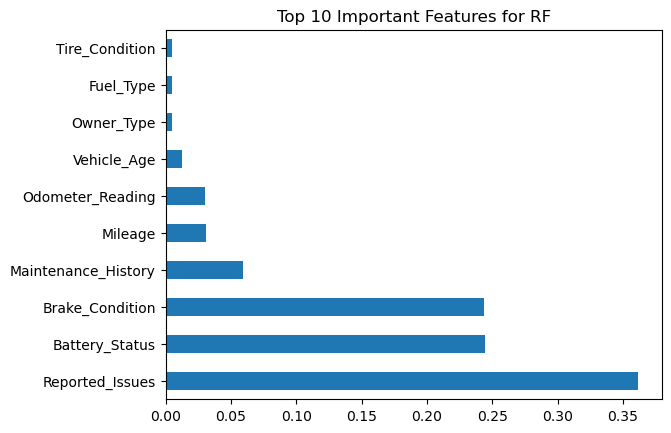

In [29]:
# Creating a Series with feature importances
feature_importance = pd.Series(clf_rf.feature_importances_, index=x.columns)

# Plotting the top 10 important features as a horizontal bar plot
feature_importance.nlargest(10).plot(kind='barh')

# Adding title to the plot
plt.title('Top 10 Important Features for RF')

# Displaying the plot
plt.show()


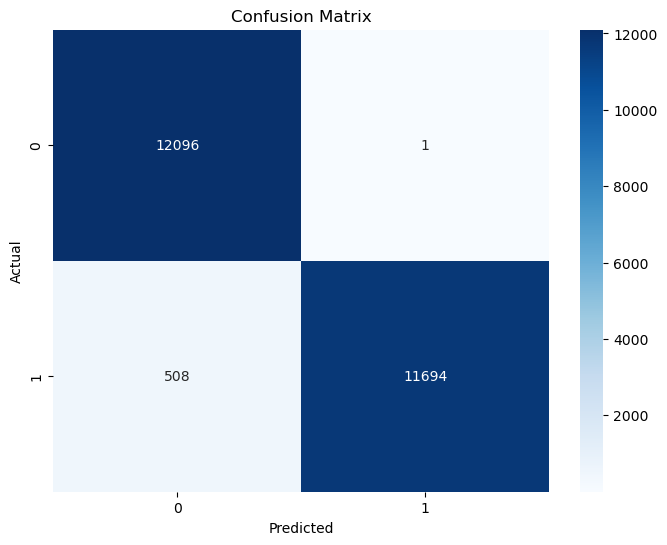

In [30]:
# Set the figure size for the plot to 8 inches by 6 inches
plt.figure(figsize=(8, 6))

# Create the confusion matrix for the predictions
cm_rf = confusion_matrix(y_test, y_pred)

# Plot the heatmap of the confusion matrix using seaborn
# sns.heatmap(): Using seaborn to create a heatmap
# cm_rf: Confusion matrix data
# annot=True: Display the numerical values in the heatmap
# cmap='Blues': Use the 'Blues' colormap for the heatmap
# fmt='g': Use general formatting for numerical values
sns.heatmap(cm_rf, annot=True, cmap='Blues', fmt='g')

# Add a title to the plot
plt.title('Confusion Matrix')

# Add labels to the x-axis and y-axis
plt.xlabel('Predicted')
plt.ylabel('Actual')

# Display the plot
plt.show()


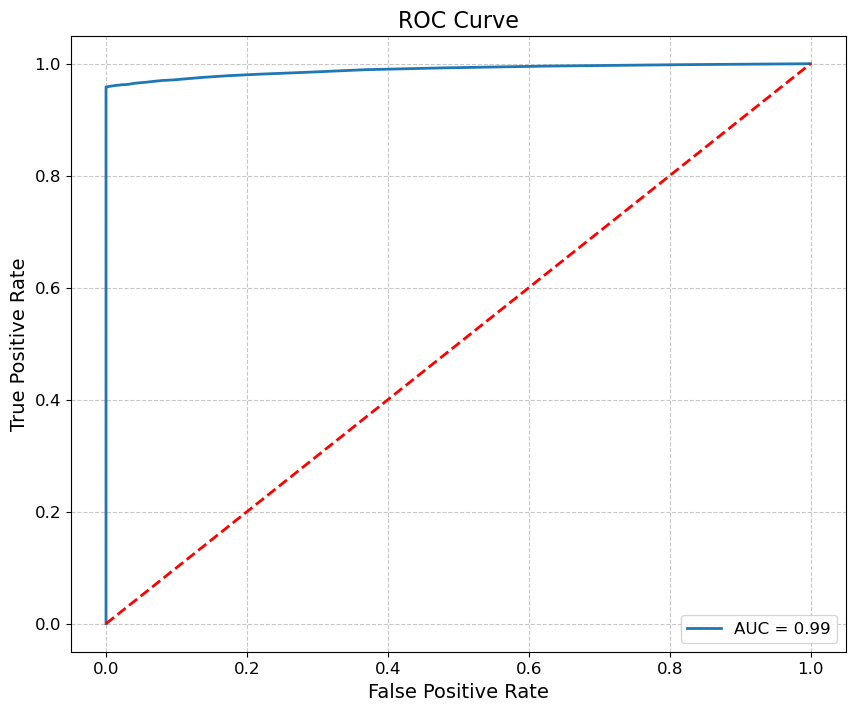

In [31]:
import matplotlib.pyplot as plt  # Importing matplotlib for visualization
from sklearn.metrics import roc_curve, roc_auc_score  # Importing necessary functions from sklearn

plt.figure(figsize=(10, 8))  # Setting the figure size

# Calculating ROC curve
y_prob = clf_rf.predict_proba(x_test)[:,1]
fpr, tpr, thresholds = roc_curve(y_test, y_prob)

# Calculating AUC score
auc = roc_auc_score(y_test, y_prob)

# Plotting ROC curve
plt.plot(fpr, tpr, label=f'AUC = {auc:.2f}', linewidth=2)
plt.plot([0, 1], [0, 1], linestyle='--', color='red', linewidth=2)

# Adding title and labels
plt.title('ROC Curve', fontsize=16)
plt.xlabel('False Positive Rate', fontsize=14)
plt.ylabel('True Positive Rate', fontsize=14)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)

# Adding legend and grid
plt.legend(loc='lower right', fontsize=12)
plt.grid(True, linestyle='--', alpha=0.7)

plt.show()  # Displaying the plot



# **Decision Tree**

In [32]:
# Initialize the DecisionTreeClassifier with a fixed random state for reproducibility
clf_dt = DecisionTreeClassifier(random_state=42)

# Fit the model on the training data
# x_train: Features for training
# y_train: Target labels for training
clf_dt.fit(x_train, y_train)

# Use the trained model to make predictions on the test data
# x_test: Features for testing
y_pred = clf_dt.predict(x_test)

# Print the confusion matrix to evaluate the performance of the classifier
# y_test: True labels for the test set
# y_pred: Predicted labels by the model
print(confusion_matrix(y_test, y_pred))

# Print a detailed classification report including precision, recall, f1-score, and support
print(classification_report(y_test, y_pred))

# Calculate and print the overall accuracy of the model
# Accuracy is the ratio of correctly predicted instances to the total instances
Accuracy = accuracy_score(y_test, y_pred)
print(Accuracy)

[[11638   459]
 [  472 11730]]
              precision    recall  f1-score   support

           0       0.96      0.96      0.96     12097
           1       0.96      0.96      0.96     12202

    accuracy                           0.96     24299
   macro avg       0.96      0.96      0.96     24299
weighted avg       0.96      0.96      0.96     24299

0.9616856660767933


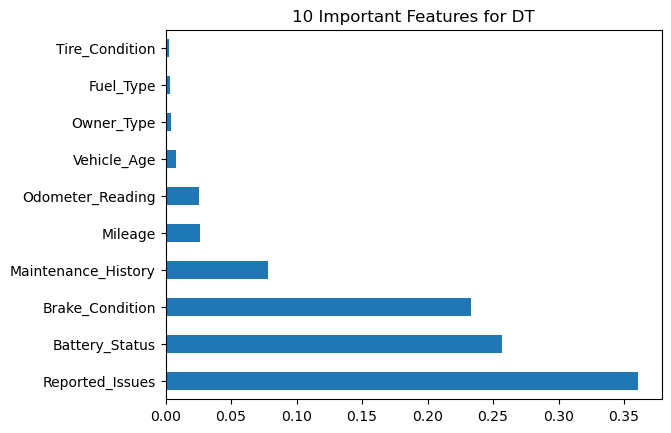

In [33]:
# Extract the feature importances from the trained decision tree classifier
# clf_dt.feature_importances_ contains the importance of each feature
# index=x.columns ensures that the feature importances are associated with the correct feature names
feature_importance = pd.Series(clf_dt.feature_importances_, index=x.columns)

# Select the 10 most important features and plot them as a horizontal bar chart
feature_importance.nlargest(10).plot(kind='barh')

# Add a title to the plot for better understanding of what it represents
plt.title('10 Important Features for DT')

# Display the plot
plt.show()

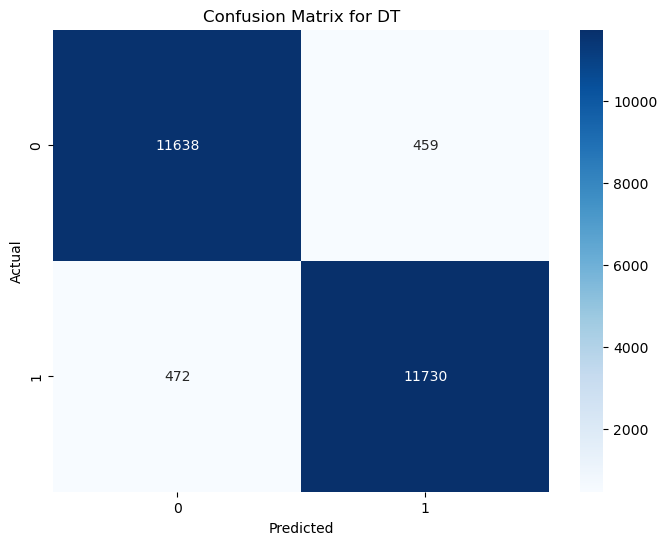

In [34]:
# Set the figure size for the plot to 8 inches by 6 inches
plt.figure(figsize=(8, 6))

# Generate the confusion matrix for the model's predictions
# cm_dt will contain the confusion matrix of true vs. predicted labels
cm_dt = confusion_matrix(y_test, y_pred)

# Create a heatmap to visualize the confusion matrix
# annot=True: Annotate each cell with the numerical value
# cmap='Blues': Use the 'Blues' color map for the heatmap
# fmt='g': Format the annotations as general numbers
sns.heatmap(cm_dt, annot=True, cmap='Blues', fmt='g')

# Add a title to the heatmap for context
plt.title('Confusion Matrix for DT')

# Label the x-axis as 'Predicted' to indicate predicted labels
plt.xlabel('Predicted')

# Label the y-axis as 'Actual' to indicate actual labels
plt.ylabel('Actual')

# Display the heatmap
plt.show()

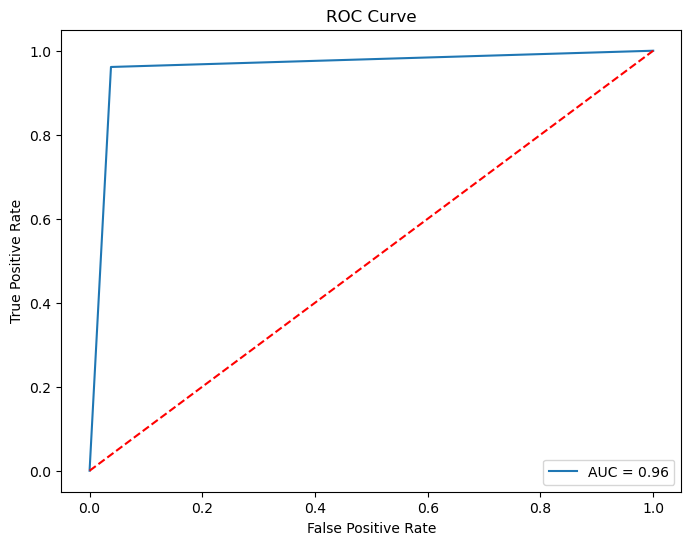

In [35]:
plt.figure(figsize=(8, 6))

# Calculate the predicted probabilities for the positive class (class 1)
# y_prob will contain the probability of positive class for each instance
y_prob = clf_dt.predict_proba(x_test)[:, 1]

# Compute the ROC curve
# fpr: False Positive Rate
# tpr: True Positive Rate
# thresholds: Thresholds used for the ROC curve
fpr, tpr, thresholds = roc_curve(y_test, y_prob)

# Calculate the Area Under the ROC Curve (AUC)
auc = roc_auc_score(y_test, y_prob)

# Plot the ROC curve
plt.plot(fpr, tpr, label=f'AUC = {auc:.2f}')

# Plot the diagonal line representing random guessing
plt.plot([0, 1], [0, 1], linestyle='--', color='red')

# Add a title to the plot
plt.title('ROC Curve')

# Label the x-axis as 'False Positive Rate'
plt.xlabel('False Positive Rate')

# Label the y-axis as 'True Positive Rate'
plt.ylabel('True Positive Rate')

# Add a legend to the plot, showing the AUC value
plt.legend(loc='lower right')

# Display the plot
plt.show()

# **AdaBoost**

In [36]:
# Initialize the AdaBoost classifier with 200 weak learners
clf_ada = AdaBoostClassifier(n_estimators=200)

# Train the AdaBoost classifier on the training data
clf_ada.fit(x_train, y_train)

# Use the trained classifier to make predictions on the test data
y_pred = clf_ada.predict(x_test)

# Print the confusion matrix to evaluate the performance of the classifier
print(confusion_matrix(y_test, y_pred))

# Print a detailed classification report including precision, recall, f1-score, and support
print(classification_report(y_test, y_pred))

# Calculate and print the overall accuracy of the model
# Accuracy is the ratio of correctly predicted instances to the total instances
Accuracy = accuracy_score(y_test, y_pred)
print(Accuracy)

/Users/mohdshoyeb/anaconda3/lib/python3.11/site-packages/sklearn/ensemble/_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


[[12082    15]
 [  994 11208]]
              precision    recall  f1-score   support

           0       0.92      1.00      0.96     12097
           1       1.00      0.92      0.96     12202

    accuracy                           0.96     24299
   macro avg       0.96      0.96      0.96     24299
weighted avg       0.96      0.96      0.96     24299

0.9584756574344623


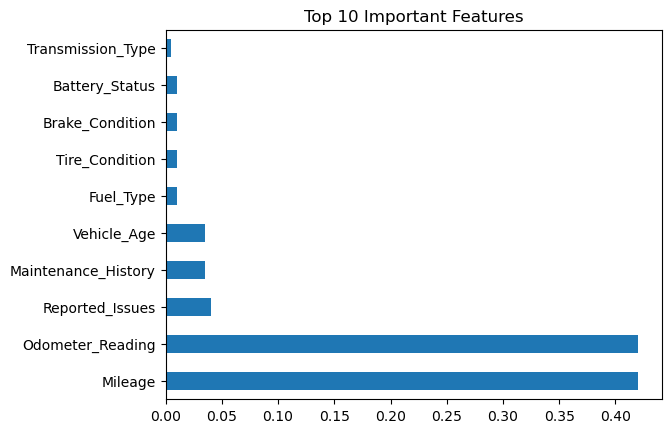

In [37]:
# Extract the feature importances from the trained AdaBoost classifier
# clf_ada.feature_importances_ contains the importance of each feature
# index=x.columns ensures that the feature importances are associated with the correct feature names
feature_importance = pd.Series(clf_ada.feature_importances_, index=x.columns)

# Select the top 10 most important features and plot them as a horizontal bar chart
feature_importance.nlargest(10).plot(kind='barh')

# Add a title to the plot for better understanding of what it represents
plt.title('Top 10 Important Features')

# Display the plot
plt.show()

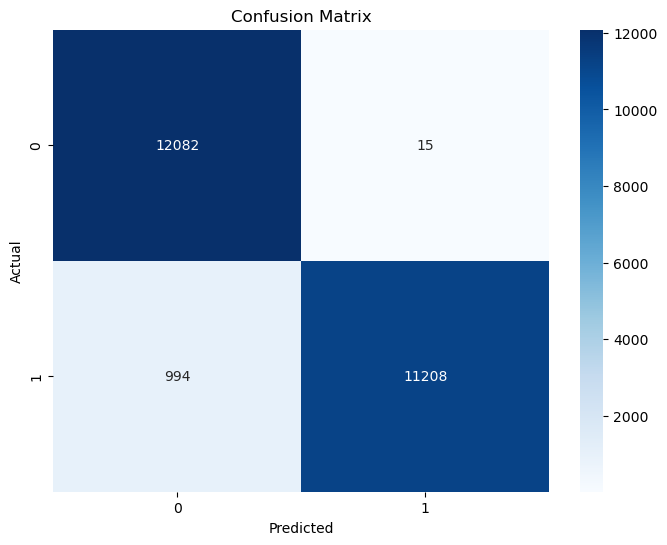

In [38]:
# Set the figure size for the plot to 8 inches by 6 inches
plt.figure(figsize=(8, 6))

# Generate the confusion matrix for the model's predictions
# cm_ada will contain the confusion matrix of true vs. predicted labels
cm_ada = confusion_matrix(y_test, y_pred)

# Create a heatmap to visualize the confusion matrix
# annot=True: Annotate each cell with the numerical value
# cmap='Blues': Use the 'Blues' color map for the heatmap
# fmt='g': Format the annotations as general numbers
sns.heatmap(cm_ada, annot=True, cmap='Blues', fmt='g')

# Add a title to the heatmap for context
plt.title('Confusion Matrix')

# Label the x-axis as 'Predicted' to indicate predicted labels
plt.xlabel('Predicted')

# Label the y-axis as 'Actual' to indicate actual labels
plt.ylabel('Actual')

# Display the plot
plt.show()


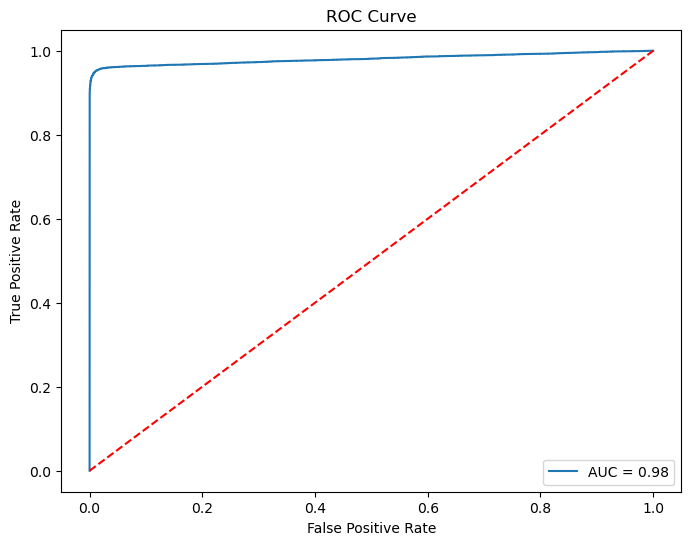

In [39]:
# Set the figure size for the plot to 8 inches by 6 inches
plt.figure(figsize=(8, 6))

# Calculate the predicted probabilities for the positive class (class 1)
# y_prob will contain the probability of positive class for each instance
y_prob = clf_ada.predict_proba(x_test)[:, 1]

# Compute the ROC curve
# fpr: False Positive Rate
# tpr: True Positive Rate
# thresholds: Thresholds used for the ROC curve
fpr, tpr, thresholds = roc_curve(y_test, y_prob)

# Calculate the Area Under the ROC Curve (AUC)
auc = roc_auc_score(y_test, y_prob)

# Plot the ROC curve
plt.plot(fpr, tpr, label=f'AUC = {auc:.2f}')

# Plot the diagonal line representing random guessing
plt.plot([0, 1], [0, 1], linestyle='--', color='red')

# Add a title to the plot
plt.title('ROC Curve')

# Label the x-axis as 'False Positive Rate'
plt.xlabel('False Positive Rate')

# Label the y-axis as 'True Positive Rate'
plt.ylabel('True Positive Rate')

# Add a legend to the plot, showing the AUC value
plt.legend(loc='lower right')

# Display the plot
plt.show()
